## Week1 Assignment 

### Loading Libraries 

In [ ]:
%matplotlib inline

In [147]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import stats

In [81]:
datapath = Path('/mnt/c/Study/CourseraFin/notebooks_and_codem01_v02/data/')

In [82]:
!ls {datapath}

BRK-A.csv				ind30_m_nfirms.csv
F-F_Research_Data_Factors.CSV		ind30_m_size.csv
F-F_Research_Data_Factors_daily.CSV	ind30_m_vw_rets.csv
F-F_Research_Data_Factors_m.csv		ind49_m_ew_rets.csv
Portfolios_Formed_on_ME_monthly_EW.csv	ind49_m_nfirms.csv
brka_d_ret.csv				ind49_m_size.csv
edhec-hedgefundindices.csv		ind49_m_vw_rets.csv
ind30_m_ew_rets.csv			sample_prices.csv


In [83]:
data= pd.read_csv(datapath/'Portfolios_Formed_on_ME_monthly_EW.csv',header=0,index_col=0,parse_dates=True,na_values=-99.99)

In [84]:
data.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [46]:
cols= ['Lo 20', 'Hi 20']

In [47]:
ret_data = data[cols]

In [48]:
ret_data.head()

,Lo 20,Hi 20
192607,-0.57,3.33
192608,3.84,2.33
192609,-0.48,-0.09
192610,-3.29,-2.95
192611,-0.55,3.16


In [49]:
ret_data=ret_data/100.

<Figure size 1440x720 with 0 Axes>

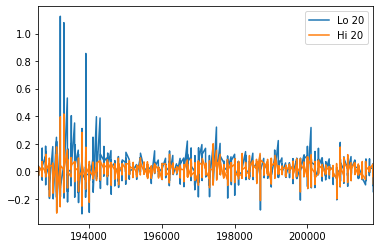

In [50]:
_=plt.figure(figsize=(20,10))
_=ret_data.plot()
_=plt.show()

In [51]:
ret_data.mean()

Lo 20    0.015904
Hi 20    0.009434
dtype: float64

In [52]:
ann_vol = ret_data.std()*np.sqrt(12)

In [53]:
n_months = ret_data.shape[0]

In [61]:
ret_per_month=(1+ret_data).prod()**(1/n_months)-1

In [62]:
annualized_return=(1+ret_per_month)**12-1

In [63]:
annualized_return

Lo 20    0.151977
Hi 20    0.098490
dtype: float64

In [64]:
sr = annualized_return/ann_vol

In [68]:
rrate=0.03
srr = (annualized_return-rrate)/ann_vol

In [69]:
srr

Lo 20    0.362271
Hi 20    0.351023
dtype: float64

In [70]:
ann_vol

Lo 20    0.336701
Hi 20    0.195116
dtype: float64

### Volatility 1999-2015

In [85]:
data.index = pd.to_datetime(data.index,format="%Y%m")

In [86]:
data.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
1926-07-01,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
1926-08-01,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
1926-09-01,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
1926-10-01,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
1926-11-01,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [87]:
ret_data= data[cols]

In [88]:
ret_data/=100.

In [89]:
ret_data.mean()

Lo 20    0.015904
Hi 20    0.009434
dtype: float64

In [91]:
ret_data=ret_data["1999":"2015"]

In [94]:
ann_vol=ret_data.std()*np.sqrt(12)

In [95]:
n_months=ret_data.shape[0]
ann_ret=(ret_data+1).prod()**(12/n_months)-1

In [97]:
ann_ret

Lo 20    0.114426
Hi 20    0.062865
dtype: float64

In [98]:
ann_vol

Lo 20    0.228894
Hi 20    0.172713
dtype: float64

### Max Drawdown

In [103]:
val_data = (ret_data+1).cumprod()

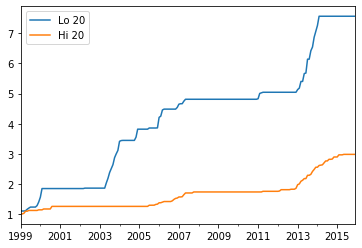

In [106]:
val_data.cummax().plot()

In [113]:
val_max = val_data.cummax()

In [114]:
drawdown = (val_data-val_max)/val_max

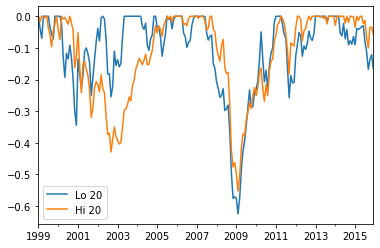

In [115]:
drawdown.plot()

In [118]:
np.min(drawdown)

Lo 20   -0.624809
Hi 20   -0.552735
dtype: float64

In [119]:
drawdown.idxmin()

Lo 20   2009-02-01
Hi 20   2009-02-01
dtype: datetime64[ns]

### Hedge fund data

In [120]:
!ls {datapath}

BRK-A.csv				ind30_m_nfirms.csv
F-F_Research_Data_Factors.CSV		ind30_m_size.csv
F-F_Research_Data_Factors_daily.CSV	ind30_m_vw_rets.csv
F-F_Research_Data_Factors_m.csv		ind49_m_ew_rets.csv
Portfolios_Formed_on_ME_monthly_EW.csv	ind49_m_nfirms.csv
brka_d_ret.csv				ind49_m_size.csv
edhec-hedgefundindices.csv		ind49_m_vw_rets.csv
ind30_m_ew_rets.csv			sample_prices.csv


In [150]:
hedge_data = pd.read_csv(datapath/'edhec-hedgefundindices.csv',parse_dates=True,index_col=0)

In [151]:
hedge_data.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01-31,1.19,3.93,1.78,7.91,1.89,2.13,1.91,5.73,2.81,1.50,1.80,-1.66,3.17
1997-02-28,1.23,2.98,1.22,5.25,1.01,0.84,1.22,1.75,-0.06,0.34,1.18,4.26,1.06
1997-03-31,0.78,-0.21,-0.12,-1.20,0.16,-0.23,1.09,-1.19,-0.84,0.60,0.10,7.78,-0.77
1997-04-30,0.86,-1.70,0.30,1.19,1.19,-0.05,1.30,1.72,0.84,-0.01,1.22,-1.29,0.09
1997-05-31,1.56,-0.15,2.33,3.15,1.89,3.46,1.18,1.08,3.94,1.97,1.73,-7.37,2.75


In [153]:
hedge2000=hedge_data["2000":]/100.

In [143]:
hedge_data= hedge_data["2009":"2018"]

In [144]:
hedge_data/=100.

In [145]:
def calc_semidev(x):
    if isinstance(x,pd.DataFrame):
        return x.aggregate(calc_semidev)
    elif isinstance(x,pd.Series):
        return x[x<0].std()
        


In [146]:
calc_semidev(hedge_data)

Convertible Arbitrage     0.006788
CTA Global                0.011089
Distressed Securities     0.009626
Emerging Markets          0.015453
Equity Market Neutral     0.005275
Event Driven              0.010278
Fixed Income Arbitrage    0.003395
Global Macro              0.005123
Long/Short Equity         0.012297
Merger Arbitrage          0.003669
Relative Value            0.005816
Short Selling             0.021383
Funds Of Funds            0.008047
dtype: float64

In [149]:
hedge_data.aggregate(stats.skew)

Convertible Arbitrage     1.305911
CTA Global                0.052062
Distressed Securities    -0.254944
Emerging Markets          0.033123
Equity Market Neutral    -0.896327
Event Driven             -0.488821
Fixed Income Arbitrage    1.121453
Global Macro              0.348184
Long/Short Equity        -0.463703
Merger Arbitrage         -0.551065
Relative Value            0.159953
Short Selling             0.456518
Funds Of Funds           -0.646908
dtype: float64

In [155]:
hedge2000.aggregate(stats.kurtosis)

Convertible Arbitrage     20.001449
CTA Global                -0.154978
Distressed Securities      3.231720
Emerging Markets           2.941289
Equity Market Neutral     17.329621
Event Driven               2.543444
Fixed Income Arbitrage    30.378729
Global Macro               0.653278
Long/Short Equity          1.472589
Merger Arbitrage           1.520785
Relative Value             9.731096
Short Selling              1.352758
Funds Of Funds             4.584725
dtype: float64